In [1]:
import pandas

In [37]:
data = pandas.read_csv("hosting_capacity.csv",index_col=[0,1]).unstack("der_value").dropna(axis=0)

In [38]:
data

node_count         link_count         load_count  \
der_value                          0 kW   10 kW       0 kW   10 kW       0 kW   
feeder                                                                          
feeder_NY_01/NY_01_12161.glm      125.0   125.0      111.0   111.0       12.0   
feeder_NY_01/NY_01_12261.glm     1147.0  1147.0      209.0   209.0      937.0   
feeder_NY_01/NY_01_12262.glm      324.0   324.0      160.0   160.0      163.0   
feeder_NY_01/NY_01_12268.glm      474.0   474.0      198.0   198.0      274.0   
feeder_NY_01/NY_01_12272.glm      215.0   215.0      172.0   172.0       41.0   
...                                 ...     ...        ...     ...        ...   
feeder_NY_38/NY_38_29557.glm      419.0   419.0      242.0   242.0      175.0   
feeder_NY_38/NY_38_31637.glm      970.0   970.0      298.0   298.0      671.0   
feeder_NY_38/NY_38_47851.glm     1113.0  1113.0      638.0   638.0      476.0   
feeder_NY_39/NY_39_41557.glm      644.0   644.0      547.0   547.0       96.0   
feeder_NY_40/NY_40_29395.glm     1535.0  1535.0     1199.0  1199.0      446.0   

                                    runtime          
der_value                     10 kW    0 kW   10 kW  
feeder                                               
feeder_NY_01/NY_01_12161.glm   12.0   0.378   0.525  
feeder_NY_01/NY_01_12261.glm  937.0   0.628   1.601  
feeder_NY_01/NY_01_12262.glm  163.0   0.423   0.757  
feeder_NY_01/NY_01_12268.glm  274.0   0.499   4.785  
feeder_NY_01/NY_01_12272.glm   41.0   0.396   0.852  
...                             ...     ...     ...  
feeder_NY_38/NY_38_29557.glm  175.0   0.471   1.642  
feeder_NY_38/NY_38_31637.glm  671.0   0.613   1.808  
feeder_NY_38/NY_38_47851.glm  476.0   0.824  28.015  
feeder_NY_39/NY_39_41557.glm   96.0   0.566   2.018  
feeder_NY_40/NY_40_29395.glm  446.0   1.112  93.397  

[476 rows x 8 columns]

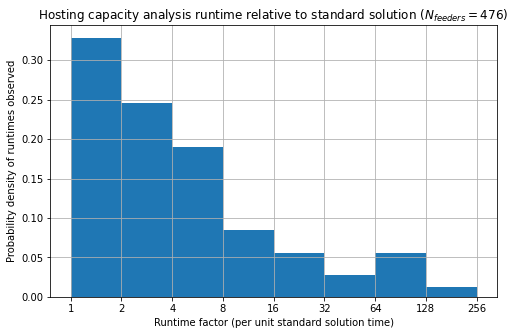

In [80]:
import matplotlib.pyplot as plt
import numpy
plt.figure(figsize=(8,5))
nmax = 9
der_values = data.columns.get_level_values(1).unique()
plt.hist(x = numpy.log2(data["runtime"][der_values[1]]/data["runtime"][der_values[0]]),
         bins = range(nmax),
         density = True)
plt.xlabel("Runtime factor (per unit standard solution time)")
plt.ylabel("Probability density of runtimes observed")
plt.xticks(range(nmax),2**numpy.arange(nmax))
plt.title(f"Hosting capacity analysis runtime relative to standard solution ($N_{{feeders}}={len(data.index)}$)")
plt.grid()

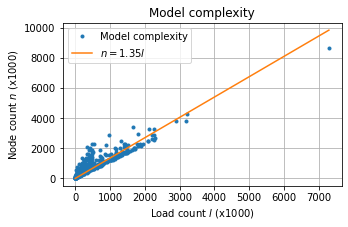

In [79]:
plt.figure(figsize=(5,3))
x = numpy.array(data["load_count"][der_values[1]])
y = numpy.array(data["node_count"][der_values[1]])
plt.plot(x,y,'.',label="Model complexity")
M = numpy.vstack([x]).transpose()
fit = numpy.linalg.solve(M.transpose()@M,M.transpose()@y)
n = numpy.arange(0,x.max(),x.max()/100)
plt.plot(n,fit[0]*n,'-',label=f'$n={fit[0]:.2f}l$')
plt.title("Model complexity")
plt.xlabel("Load count $l$ (x1000)")
plt.ylabel("Node count $n$ (x1000)")
plt.grid()
plt.legend();

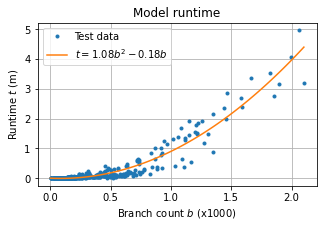

In [78]:
plt.figure(figsize=(5,3))
plt.clf()
x = numpy.array(data["link_count"][der_values[1]])/1000
y = numpy.array(data["runtime"][der_values[1]])/60
plt.plot(x,y,'.',label="Test data")
M = numpy.vstack([x,x**2]).transpose()
fit = numpy.linalg.solve(M.transpose()@M,M.transpose()@y)
b = numpy.arange(0,x.max(),x.max()/100)
plt.plot(b,(b*fit[1]+fit[0])*b,'-',label=f'$t={fit[1]:.2f}b^2{fit[0]:+.2f}b$')
plt.title("Model runtime")
plt.xlabel("Branch count $b$ (x1000)")
plt.ylabel("Runtime $t$ (m)")
plt.grid()
plt.legend();